In [1]:
import configparser

config = configparser.ConfigParser()
config.read('../config.ini')
key = config['setting']['ACCOUNT_KEY']
endpoint = config['setting']['END_POINT']

In [12]:
from img2table.ocr import TesseractOCR
from img2table.document import Image
from img2table.ocr import AzureOCR
import cv2
from PIL import Image as PILImage

PWD = '/Users/satoki252595/work/20240114_nriocr2'

PATH_IMAGE = PWD + '/static/image/'
PATH_TEXT = PWD + '/static/text/'

def getImageTable_Azuru(img_path):
    
    # Instantiation of OCR
    ocr = AzureOCR(endpoint=endpoint,subscription_key=key)

    # Instantiation of document, either an image or a PDF
    doc = Image(src = img_path)

    # Table extraction
    extracted_tables = doc.extract_tables(ocr=ocr,
                                        implicit_rows=True,
                                        borderless_tables=True,
                                        min_confidence=50)
    
    return extracted_tables

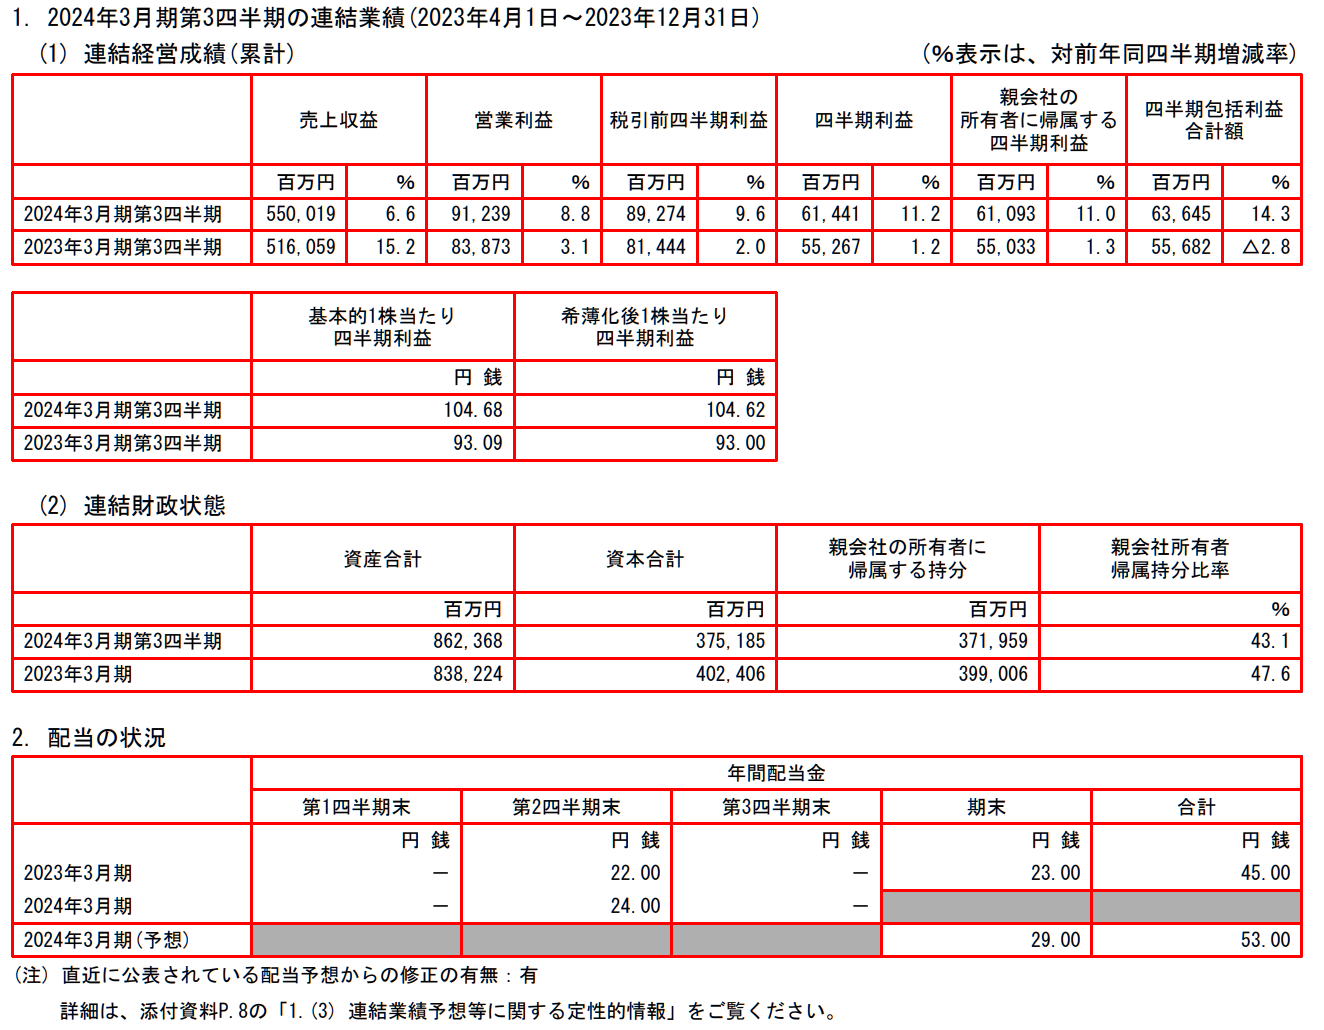

In [13]:
extracted_tables = getImageTable_Azuru(PATH_IMAGE + '4307.png')

# Display extracted tables
table_img = cv2.imread(PATH_IMAGE + '4307.png')

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
            
PILImage.fromarray(table_img)

In [14]:
extracted_tables[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,売 上 収 益,売 上 収 益,営 業 利 益,営 業 利 益,税 引 前 四 半 期 利 益,税 引 前 四 半 期 利 益,四 半 期 利 益,四 半 期 利 益,親 会 社 の\n所 有 者 に 帰 属 す る\n四 半 期 利 益,親 会 社 の\n所 有 者 に 帰 属 す る\n四 半 期 利 益,四 半 期 包 括 利 益\n合 計 額,四 半 期 包 括 利 益\n合 計 額
1,None,百 万 円,%,百 万 円,%,百 万 円,%,百 万 円,%,百 万 円,%,百 万 円,%
2,2024 年 3 月 期 第 3 四 半 期,"550, 019",6. 6,"91, 239",8. 8,"89, 274",9.6,"61,441",11.2,"61,093",11.0,"63, 645",14.3
3,2023 年 3 月 期 第 3 四 半 期,"516,059",15.2,"83, 873",3.1,"81,444",2. 0,"55, 267",1.2,"55, 033",1.3,"55, 682",△2.8


In [15]:
extracted_tables[1].df

,0,1,2
0,None,基 本 的 1 株 当 た り\n四 半 期 利 益,希 薄 化 後 1 株 当 た り\n四 半 期 利 益
1,None,円 銭,円 銭
2,2024 年 3 月 期 第 3 四 半 期,104. 68,104. 62
3,2023 年 3 月 期 第 3 四 半 期,93.09,93.00


In [16]:
extracted_tables[2].df

,0,1,2,3,4
0,None,資 産 合 計,資 本 合 計,親 会 社 の 所 有 者 に\n帰 属 す る 持 分,親 会 社 所 有 者\n帰 属 持 分 比 率
1,None,百 万 円,百 万 円,百 万 円,%
2,2024 年 3 月 期 第 3 四 半 期,"862,368","375, 185","371,959",43.1
3,2023 年 3 月 期,"838, 224","402, 406","399,006",47.6


In [17]:
extracted_tables[3].df

,0,1,2,3,4,5
0,None,年 間 配 当 金,年 間 配 当 金,年 間 配 当 金,年 間 配 当 金,年 間 配 当 金
1,None,第 1 四 半 期 末,第 2 四 半 期 末,第 3 四 半 期 末,期 末,合 計
2,2023 年 3 月 期\n2024 年 3 月 期,円 銭,円 銭\n22. 00\n24. 00,円 銭,円 銭\n23.00,円 銭\n45.00
3,2023 年 3 月 期\n2024 年 3 月 期,円 銭,円 銭\n22. 00\n24. 00,円 銭,None,None
4,2024 年 3 月 期 ( 予 想 ),None,None,None,29.00,53.00


「.」と「,」の違いも区別できているため、Azuruなら文字認識完璧かも。普通の帳票なら利用できそう。

df形式で格納が出来ているので、マスク処理は不要。事前に現新比較対象のセルの指定は必要。
オブジェクトを貼り付けたり、事前に該当部分（X座標、Y座標を指定）することでマスク処理は可能。どっちが楽かは要検討。

In [41]:
##Azureセットアップ

import configparser

config = configparser.ConfigParser()
config.read('../config.ini')
key = config['setting']['ACCOUNT_KEY']
endpoint = config['setting']['END_POINT']

##OCR関数

from img2table.ocr import TesseractOCR
from img2table.document import Image
from img2table.ocr import AzureOCR
import cv2
from PIL import Image as PILImage

import os

##PWD = os.getcwd()
PWD = '/Users/satoki252595/work/20240114_nriocr2'

PATH_IMAGE = PWD + '/static/image/'

PATH_IMAGE = PWD + '/static/image/'
PATH_TEXT = PWD + '/static/text/'

def getImageTable_Azuru(img_path,lessFlag= False):
    
    # Instantiation of OCR
    ocr = AzureOCR(endpoint=endpoint,subscription_key=key)

    # Instantiation of document, either an image or a PDF
    doc = Image(src = img_path)

    
    # 見えない線を加味するかしないか。
    implicit_rows = False
    borderless_tables = False
    if lessFlag == True:
        implicit_rows = True
        borderless_tables = True
        

    # Table extraction
    extracted_tables = doc.extract_tables(ocr=ocr,
                                        implicit_rows=implicit_rows,
                                        borderless_tables=borderless_tables,
                                        min_confidence=50)
    
    return extracted_tables

def visualTable(extracted_tables,imageFileName,BA_Flag='mae'):

    if BA_Flag == 'mae':
        
        # Display extracted tables
        table_img = cv2.imread(PATH_IMAGE +'mae/'+imageFileName)

    if BA_Flag == 'ato':
        # Display extracted tables
        table_img = cv2.imread(PATH_IMAGE +'ato/'+imageFileName)
        

    for table in extracted_tables:
        for row in table.content.values():
            for cell in row:
                cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
                
    return PILImage.fromarray(table_img)


    
t_mae = extracted_tables = getImageTable_Azuru(PATH_IMAGE + 'mae/'+ '4307.png',lessFlag = False)
t_ato = extracted_tables = getImageTable_Azuru(PATH_IMAGE + 'ato/'+ '4307.png',lessFlag = False)
vt_mae_image = visualTable(t_mae,'4307.png',BA_Flag='mae')
vt_ato_image = visualTable(t_ato,'4307.png',BA_Flag='ato')

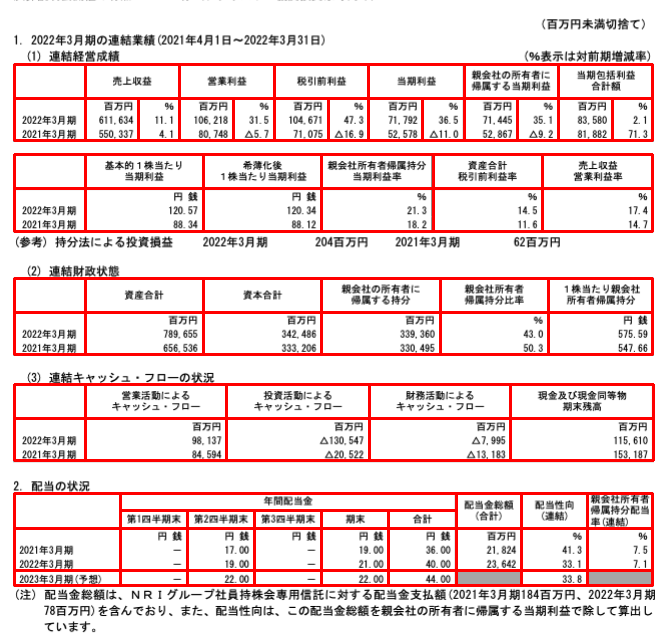

In [42]:
vt_mae_image

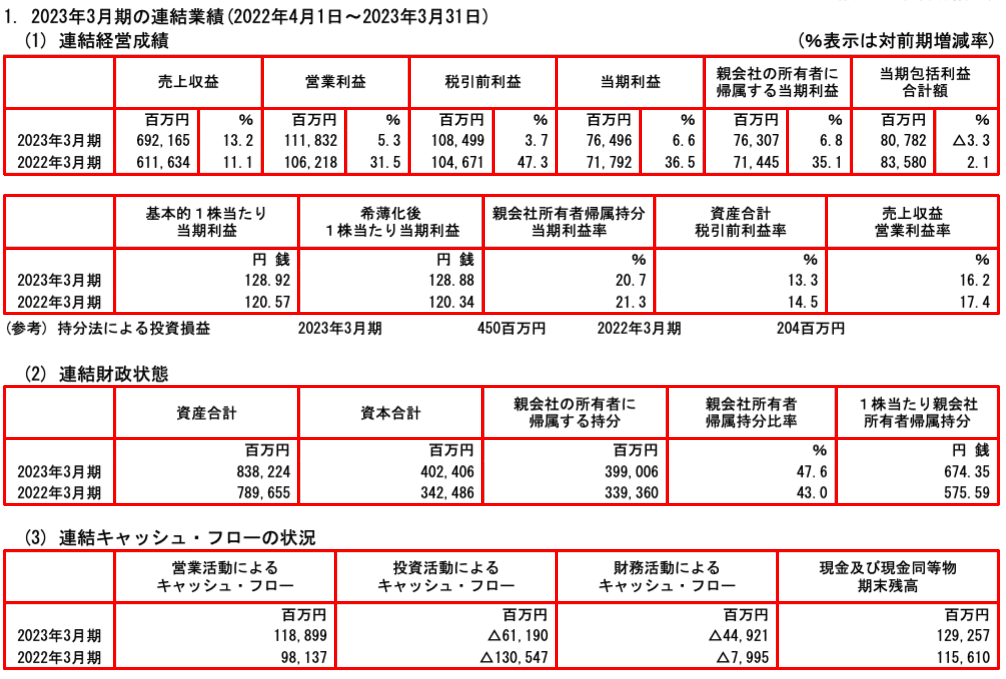

In [43]:
vt_ato_image

In [44]:
t_ato[3].df

,0,1,2,3,4
0,None,営 業 活 動 に よ る\nキ ャ ッ シ ュ · フ ロ ー,投 資 活 動 に よ る\nキ ャ ッ シ ュ · フ ロ ー,財 務 活 動 に よ る\nキ ャ ッ シ ュ · フ ロ ー,現 金 及 び 現 金 同 等 物\n期 末 残 高
1,2023 年 3 月 期\n2022 年 3 月 期,"百 万 円\n118, 899\n98, 137","百 万 円\nA61, 190\n△130, 547","百 万 円\nA44, 921\nA7, 995","百 万 円\n129, 257\n115, 610"


In [45]:
for t in t_mae:
    print(t.df)
    print('---------------------')

for t in t_ato:
    print(t.df)
    print('---------------------')

                           0                          1              2   \
0                        None                    売 上 収 益        売 上 収 益   
1  2022 年 3 月 期\n2021 年 3 月 期  百 万 円\n611. 634\n550, 337  9%\n11.1\n1.1   

                       3                4                        5   \
0                   営 業 利            営 業 利                税 引 前 利 益   
1  百 円\n106. 218\n80, 748  96\n31.5\n△5. 7  百 万 円\n104. 671\n71.075   

             6                        7                8   \
0     税 引 前 利 益                  当 期 利 益          当 期 利 益   
1  47. 3\n416.9  百 万 円\n71, 792\n52, 578  96\n36.5\n△11.0   

                                 9                                 10  \
0  親 会 社 の 所 有 者 に\n帰 属 す る 当 期 利 益  親 会 社 の 所 有 者 に\n帰 属 す る 当 期 利 益   
1             百 万 円\n71,445\n52,867                    96\n35.1\n49.2   

                        11                  12  
0       当 期 包 括 利 益\n合 計 額  当 期 包 括 利 益\n合 計 額  
1  百 万 円\n83, 580\n81, 882            2.1\n71.  
---------

In [46]:
t_mae = extracted_tables = getImageTable_Azuru(PATH_IMAGE + 'mae/'+ '4307.png',lessFlag = True)
t_ato = extracted_tables = getImageTable_Azuru(PATH_IMAGE + 'ato/'+ '4307.png',lessFlag = True)
vt_mae_image = visualTable(t_mae,'4307.png',BA_Flag='mae')
vt_ato_image = visualTable(t_ato,'4307.png',BA_Flag='ato')

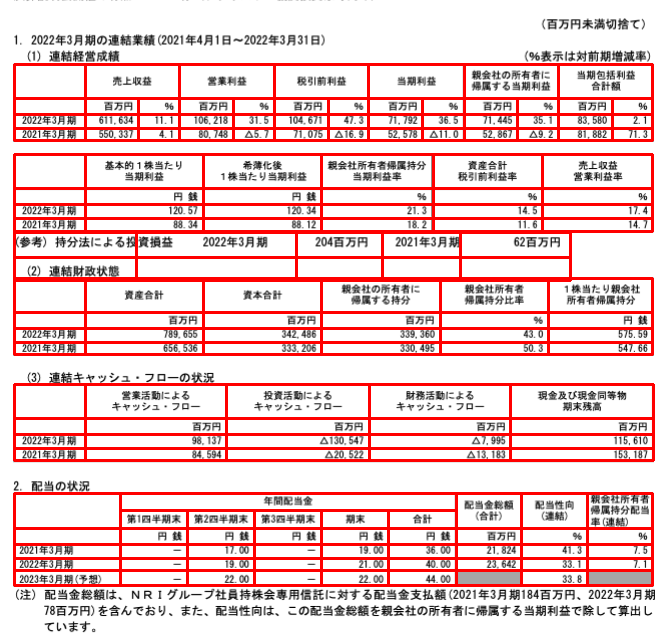

In [47]:
vt_mae_image

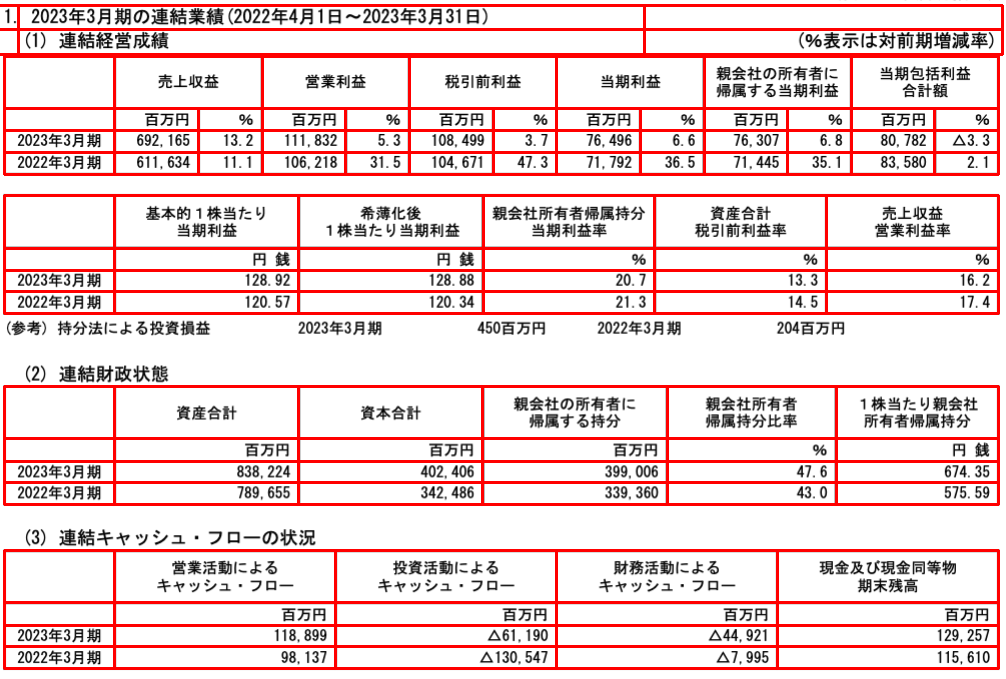

In [48]:
vt_ato_image

In [49]:
t_mae

[ExtractedTable(title=( 百 万 円 未 満 切 捨 て )
 1. 2022 年 3 月 期 の 連 結 業 績 (2021 年 4 月 1 日 ~2022 年 3 月 31 日 )
 (1) 連 結 経 営 成 績
 (% 表 示 は 対 前 期 増 減 率 ), bbox=(14, 64, 652, 140),shape=(4, 13)),
 ExtractedTable(title=None, bbox=(14, 154, 652, 231),shape=(4, 6)),
 ExtractedTable(title=None, bbox=(14, 232, 570, 280),shape=(2, 5)),
 ExtractedTable(title=None, bbox=(14, 278, 652, 354),shape=(4, 6)),
 ExtractedTable(title=(3) 連 結 キ ャ ッ シ ュ · フ ロ ー の 状 況, bbox=(14, 384, 653, 460),shape=(4, 5)),
 ExtractedTable(title=2. 配 当 の 状 況, bbox=(14, 493, 652, 585),shape=(6, 9))]

In [52]:
t_ato[0].df

,0,1,2
0,1.,2023 年 3 月 期 の 連 結 業 績 (2022 年 4 月 1 日 ~2023 年...,None
1,None,(1) 連 結 経 営 成 績,(% 表 示 は 対 前 期 増 減 率 )


In [259]:
##Azureセットアップ

import configparser

config = configparser.ConfigParser()
config.read('../config.ini')
key = config['setting']['ACCOUNT_KEY']
endpoint = config['setting']['END_POINT']

##OCR関数

from img2table.ocr import TesseractOCR
from img2table.document import Image
from img2table.ocr import AzureOCR
import cv2
from PIL import Image as PILImage

import os

##PWD = os.getcwd()
PWD = '/Users/satoki252595/work/20240114_nriocr2'

PATH_IMAGE = PWD + '/static/image/'

PATH_IMAGE = PWD + '/static/image/'
PATH_TEXT = PWD + '/static/text/'

def getImageTable_Azuru(img_path,lessFlag= False):
    
    # Instantiation of OCR
    ocr = AzureOCR(endpoint=endpoint,subscription_key=key)

    # Instantiation of document, either an image or a PDF
    doc = Image(src = img_path)

    
    # 見えない線を加味するかしないか。
    implicit_rows = False
    borderless_tables = False
    if lessFlag == True:
        implicit_rows = True
        borderless_tables = True
        

    # Table extraction
    extracted_tables = doc.extract_tables(ocr=ocr,
                                        implicit_rows=implicit_rows,
                                        borderless_tables=borderless_tables,
                                        min_confidence=50)
    
    return extracted_tables

def visualTable(extracted_tables,imageFileName,BA_Flag='mae'):

    if BA_Flag == 'mae':
        
        # Display extracted tables
        table_img = cv2.imread(PATH_IMAGE +'mae/'+imageFileName)

    if BA_Flag == 'ato':
        # Display extracted tables
        table_img = cv2.imread(PATH_IMAGE +'ato/'+imageFileName)
        

    for table in extracted_tables:
        for row in table.content.values():
            for cell in row:
                cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
                
    return PILImage.fromarray(table_img)

FileName = '4307_2024.png'
    
t_mae = extracted_tables = getImageTable_Azuru(PATH_IMAGE + 'mae/'+ FileName,lessFlag = False)
t_ato = extracted_tables = getImageTable_Azuru(PATH_IMAGE + 'ato/'+ FileName,lessFlag = False)
vt_mae_image = visualTable(t_mae,FileName,BA_Flag='mae')
vt_ato_image = visualTable(t_ato,FileName,BA_Flag='ato')

In [348]:
## OCRのAPIによって、空白があったり無かったりするので、これを解決するために空白や改行コード削除処理を行う。
## ★制約として、現新比較する場合に空白を検知できないので、そこを見分ける必要がある。

t_mae_cleansing = []

for t_mae_ExtractedTable in t_mae:
    if t_mae_ExtractedTable.title != None:
        title = t_mae_ExtractedTable.title.replace('\n','')
        title = title.replace(' ','')
        title = title.replace('　','')
    df = t_mae_ExtractedTable.df.replace('\n','',regex=True)
    df = df.replace(' ','',regex=True)
    df = df.replace('　','',regex=True)
    t_mae_cleansing.append([title,df])

t_ato_cleansing = []

for t_ato_ExtractedTable in t_ato:
    if t_ato_ExtractedTable.title != None:
        title = t_ato_ExtractedTable.title.replace('\n','')
        title = title.replace(' ','')
        title = title.replace('　','')
    df = t_ato_ExtractedTable.df.replace('\n','',regex=True)
    df = df.replace(' ','',regex=True)
    df = df.replace('　','',regex=True)
    t_ato_cleansing.append([title,df])


In [360]:
##クレンジング前

df_mae = t_mae[0].df
df_ato = t_ato[0].df

if df_mae.shape == df_ato.shape:
    df_diff = df_mae==df_ato
    print(df_diff)

      0     1     2     3     4      5     6      7     8      9      10  \
0  False  True  True  True  True   True  True   True  True   True   True   
1   True  True  True  True  True  False  True  False  True  False  False   

      11    12  
0   True  True  
1  False  True  


In [361]:
##クレンジング後

df_diff = t_mae_cleansing[0][1]==t_ato_cleansing[0][1]
df_diff

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,False,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True


In [368]:
t_mae_cleansing[0][1][0][0]

In [369]:
t_ato_cleansing[0][1][0][0]

In [317]:
## t_mae_info = [[title,df],[title,df]...]
t_mae_info = [[t_mae_obj.title,t_mae_obj.df] for t_mae_obj in t_mae]

print(t_mae_info[0][1].replace('\n','',regex=True))


                         0                      1          2   \
0                      None                売 上 収 益    売 上 収 益   
1  2023 年 3 月 期2022 年 3 月 期  百 万 円692, 165611, 634  %13.211.1   

                      3         4                     5          6   \
0                営 業 利 益   営 業 利 益             税 引 前 利 益  税 引 前 利 益   
1  百 万 円111, 832106, 218  %5.331.5  百 万 円108,499104, 671   %3.747.3   

                    7         8                               9   \
0              当 期 利 益   当 期 利 益  親 会 社 の 所 有 者 に帰 属 す る 当 期 利 益   
1  百 万 円76, 49671, 792  %6.636.5             百 万 円76, 30771, 445   

                               10                   11                12  
0  親 会 社 の 所 有 者 に帰 属 す る 当 期 利 益     当 期 包 括 利 益合 計 額  当 期 包 括 利 益合 計 額  
1                       %6.835. 1  百 万 円80, 78283, 580          %△3.32.1  


In [195]:
t_mae[4].df

,0,1,2,3,4,5,6,7,8
0,None,年 間 配 当 金,年 間 配 当 金,年 間 配 当 金,年 間 配 当 金,年 間 配 当 金,配 当 金 総 額\n( 合 計 ),配 当 性 向\n( 連 結 ),親 会 社 所 有 者\n帰 属 持 分 配 当\n率 ( 連 結 )
1,None,第 1 四 半 期 末,第 2 四 半 期 末,第 3 四 半 期 末,期 末,合 計,配 当 金 総 額\n( 合 計 ),配 当 性 向\n( 連 結 ),親 会 社 所 有 者\n帰 属 持 分 配 当\n率 ( 連 結 )
2,2022 年 3 月 期\n2023 年 3 月 期,円 銭\n一 一,円 銭\n19.00\n22. 00,円 銭\n1 1,円 銭\n21. 00\n23. 00,円 銭\n40. 00\n45. 00,"百 万 円\n23, 642\n26, 640",%\n33.1\n34. 9,%\n7.1\n7.2
3,2024 年 3 月 期 ( 予 想 ),None,24.00,None,24.00,48.00,None,36. 4,None


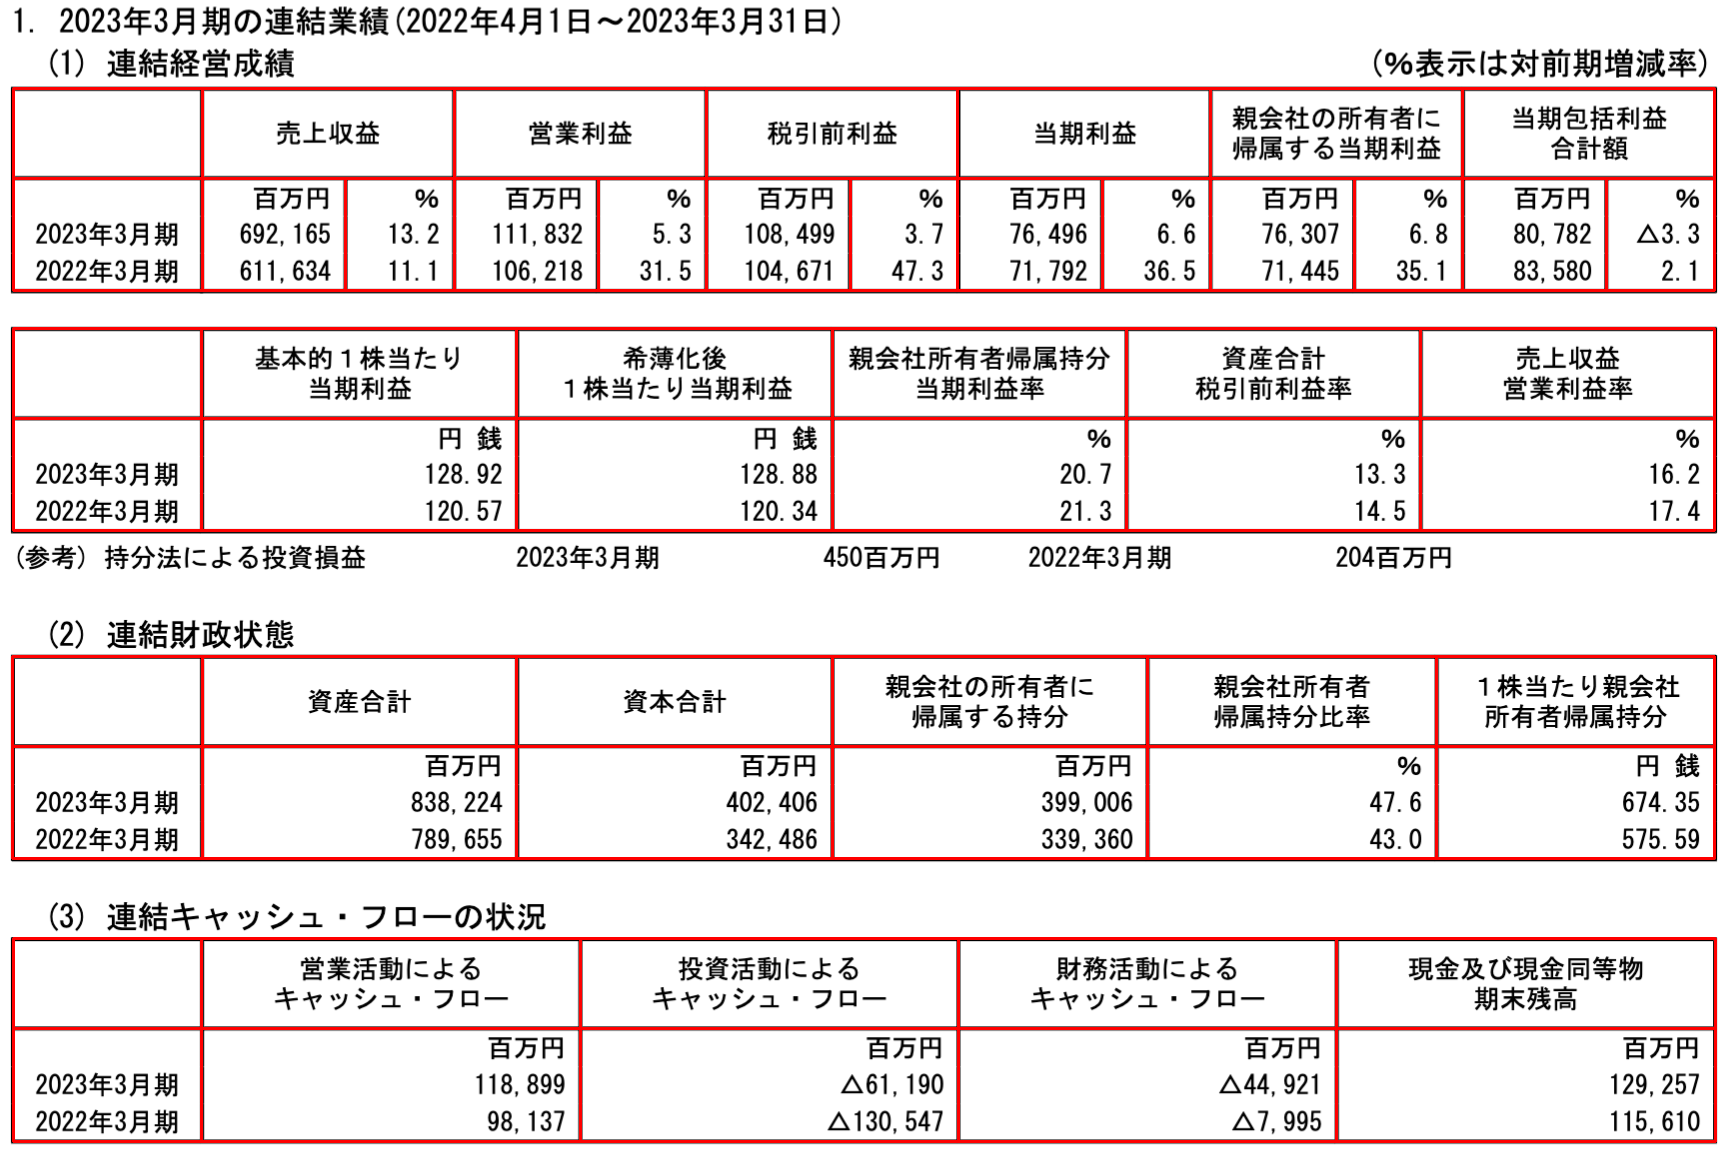

In [83]:
vt_ato_image

In [119]:
t_mae

[ExtractedTable(title=( 百 万 円 未 満 切 捨 て )
 1. 2023 年 3 月 期 の 連 結 業 績 (2022 年 4 月 1 日 ~2023 年 3 月 31 日 )
 (1) 連 結 経 営 成 績
 (% 表 示 は 対 前 期 増 減 率 ), bbox=(29, 115, 1448, 283),shape=(2, 13)),
 ExtractedTable(title=None, bbox=(29, 315, 1448, 483),shape=(2, 6)),
 ExtractedTable(title=(2) 連 結 財 政 状 態, bbox=(29, 588, 1448, 757),shape=(2, 6)),
 ExtractedTable(title=(3) 連 結 キ ャ ッ シ ュ · フ ロ ー の 状 況, bbox=(29, 824, 1448, 992),shape=(2, 5)),
 ExtractedTable(title=2. 配 当 の 状 況, bbox=(29, 1065, 1447, 1269),shape=(4, 9))]

In [120]:
t_mae[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,売 上 収 益,売 上 収 益,営 業 利 益,営 業 利 益,税 引 前 利 益,税 引 前 利 益,当 期 利 益,当 期 利 益,親 会 社 の 所 有 者 に\n帰 属 す る 当 期 利 益,親 会 社 の 所 有 者 に\n帰 属 す る 当 期 利 益,当 期 包 括 利 益\n合 計 額,当 期 包 括 利 益\n合 計 額
1,2023 年 3 月 期\n2022 年 3 月 期,"百 万 円\n692, 165\n611, 634",%\n13.2\n11.1,"百 万 円\n111, 832\n106, 218",%\n5.3\n31.5,"百 万 円\n108,499\n104, 671",%\n3.7\n47.3,"百 万 円\n76, 496\n71, 792",%\n6.6\n36.5,"百 万 円\n76, 307\n71, 445",%\n6.8\n35. 1,"百 万 円\n80, 782\n83, 580",%\n△3.3\n2.1


In [87]:
t_ato[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,売 上 収 益,売 上 収 益,営 業 利 益,営 業 利 益,税 引 前 利 益,税 引 前 利 益,当 期 利 益,当 期 利 益,親 会 社 の 所 有 者 に\n帰 属 す る 当 期 利 益,親 会 社 の 所 有 者 に\n帰 属 す る 当 期 利 益,当 期 包 括 利 益\n合 計 額,当 期 包 括 利 益\n合 計 額
1,2023 年 3 月 期\n2022 年 3 月 期,"百 万 円\n692, 165\n611, 634",%\n13.2\n11.1,"百 万 円\n111, 832\n106, 218",%\n5.3\n31.5,"百 万 円\n108, 499\n104, 671",%\n3.7\n47.3,"百 万 円\n76,496\n71,792",%\n6.6\n36.5,"百 万 円\n76,307\n71,445",%\n6.8\n35.1,"百 万 円\n80, 782\n83,580",%\n△3.3\n2.1


In [197]:
df_mae = t_mae[0].df
df_ato = t_ato[0].df

if df_mae.shape == df_ato.shape:
    df_diff = df_mae==df_ato
    print(df_diff)

      0     1     2     3     4      5     6      7     8      9      10  \
0  False  True  True  True  True   True  True   True  True   True   True   
1   True  True  True  True  True  False  True  False  True  False  False   

      11    12  
0   True  True  
1  False  True  


In [104]:
print(df_mae.iloc[1,7],df_ato.iloc[1,7])

百 万 円
76, 496
71, 792 百 万 円
76,496
71,792


In [158]:
df_mae = t_mae[0].df
a = df_mae.iloc[1,10].replace('\n','')
a

'%6.835. 1'

In [169]:
type(t_mae[0].df[0][0])

NoneType

In [174]:
for column_name, item in df_mae.items():
    for index, row in df_mae.iterrows():
        if df_mae[column_name][index] != None:
            df_mae[column_name][index] = df_mae[column_name][index].replace('\n','')
            df_mae[column_name][index] = df_mae[column_name][index].replace('\s','')

df_mae

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,売 上 収 益,売 上 収 益,営 業 利 益,営 業 利 益,税 引 前 利 益,税 引 前 利 益,当 期 利 益,当 期 利 益,親 会 社 の 所 有 者 に帰 属 す る 当 期 利 益,親 会 社 の 所 有 者 に帰 属 す る 当 期 利 益,当 期 包 括 利 益合 計 額,当 期 包 括 利 益合 計 額
1,2023 年 3 月 期2022 年 3 月 期,"百 万 円692, 165611, 634",%13.211.1,"百 万 円111, 832106, 218",%5.331.5,"百 万 円108,499104, 671",%3.747.3,"百 万 円76, 49671, 792",%6.636.5,"百 万 円76, 30771, 445",%6.835. 1,"百 万 円80, 78283, 580",%△3.32.1


In [160]:
df_mae = t_mae[0].df
df_ato = t_ato[0].df

if df_mae.shape == df_ato.shape:
    df_diff = df_mae==df_ato
    print(df_diff)

      0     1     2     3     4      5     6      7     8      9      10  \
0  False  True  True  True  True   True  True   True  True   True   True   
1   True  True  True  True  True  False  True  False  True  False  False   

      11    12  
0   True  True  
1  False  True  


In [196]:
## データ量が同じ場合と異なる場合で処理が異なる。
## 1.画像内の表の数が一致しているか？
## 2.表内のデータフレームのshapeが一致しているか？
## の2段階でif文処理を入れる必要がある。1.の処理が難しい。

##空白を削除してしまうと、本来空白の箇所を見逃してしまうのでは？？単純な画像認識

## 2.の部分。

if t_mae[0].df.shape == t_ato[0].df.shape:

SyntaxError: incomplete input (2469628660.py, line 10)

In [219]:
s = "ai\nue"
s = s.replace("\n","")
s

'aiue'

In [260]:
##空白や改行コードの削除処理  →改行コードは削除できているけど、置換ができない。→誰かに聞こう
## 参考になるかも：https://www.learning-nao.com/?p=3453　やり方が違う。

for df_mae in t_mae:
    for column_name, item in df_mae.df.items():
        for index, row in df_mae.df.iterrows():
            if df_mae.df.at[index,column_name] != None:
                df_mae.df.at[index,column_name] = df_mae.df.at[index,column_name].replace('\n','')
                df_mae.df.at[index,column_name] = df_mae.df[column_name][index].replace('\s','')
                print(df_mae.df.at[index,column_name])
                print('-------')

for df_ato in t_ato:
    for column_name, item in df_ato.df.items():
        for index, row in df_ato.df.iterrows():
            if df_ato.df[column_name][index] != None:
                df_ato.df[column_name][index] = df_ato.df[column_name][index].replace('\n','')
                df_ato.df[column_name][index] = df_ato.df[column_name][index].replace('\s','')


2023 年 3 月 期
2022 年 3 月 期
-------
売 上 収 益
-------
百 万 円
692, 165
611, 634
-------
売 上 収 益
-------
%
13.2
11.1
-------
営 業 利 益
-------
百 万 円
111, 832
106, 218
-------
営 業 利 益
-------
%
5.3
31.5
-------
税 引 前 利 益
-------
百 万 円
108,499
104, 671
-------
税 引 前 利 益
-------
%
3.7
47.3
-------
当 期 利 益
-------
百 万 円
76, 496
71, 792
-------
当 期 利 益
-------
%
6.6
36.5
-------
親 会 社 の 所 有 者 に
帰 属 す る 当 期 利 益
-------
百 万 円
76, 307
71, 445
-------
親 会 社 の 所 有 者 に
帰 属 す る 当 期 利 益
-------
%
6.8
35. 1
-------
当 期 包 括 利 益
合 計 額
-------
百 万 円
80, 782
83, 580
-------
当 期 包 括 利 益
合 計 額
-------
%
△3.3
2.1
-------
2023 年 3 月 期
2022 年 3 月 期
-------
基 本 的 1 株 当 た り
当 期 利 益
-------
円 銭
128. 92
120.57
-------
希 薄 化 後
1 株 当 た り 当 期 利 益
-------
円 銭
128. 88
120. 34
-------
親 会 社 所 有 者 帰 属 持 分
当 期 利 益 率
-------
%
20. 7
21.3
-------
資 産 合 計
税 引 前 利 益 率
-------
%
13. 3
14.5
-------
売 上 収 益
営 業 利 益 率
-------
%
16.2
17.4
-------
2023 年 3 月 期
2022 年 3 月 期
-------
資 産 合 計
-------
百 万 円
838, 224
789, 655
-------
資 本 合 計
--